![Qiskit](https://user-images.githubusercontent.com/50955024/69568348-ac558780-0f78-11ea-9242-7ac8e8ba450a.png)

In [84]:
# make the imports that are necessary for our work
import numpy as np
import qiskit as qk
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit import IBMQ
from qiskit.visualization import plot_histogram

# Entanglement

Quantum entanglement is a physical phenomenon that occurs when pairs or groups of particles are generated or interact in ways such that the quantum state of each particle cannot be described independently instead, a quantum state must be described for the system as a whole. This means for an entangled system, the quantum state of composite system cannot be factored as a product of states of its local constituents. 

Therefore, it can only be expressed as a sum, or superposition, of products of states of local constituents with more than one term, i.e., a state $|\psi\rangle$ is said to be entangled if $|\psi\rangle \neq |a\rangle \otimes |b\rangle$ for any two subsystem states $|a\rangle$ and $|b\rangle$. 


# Preparing Entangled States

We will try to prepare some of the most important (and popular) entangled quantum states, and also the their applications:

1. Bell states
2. Greenberger-Horne-Zeilinger state i.e. (GHZ state)
3. W state

# Bell States

The Bell states (or EPR states) are specific quantum states of two qubits that represent the simplest (and maximal) examples of quantum entanglement.



$$|\Phi^{\pm}\rangle = \frac{|00\rangle \pm |11\rangle}{\sqrt{2}} $$
$$|\Psi^{\pm}\rangle = \frac{|01\rangle \pm |10\rangle}{\sqrt{2}} $$

## Preparing Bell States

In quantum circuit language, the way to create a Bell pair between two qubits is to first transfer one of them to the Bell basis ($|+\rangle$ and $|-\rangle$) by using a Hadamard gate, and then to apply a CNOT gate onto the other qubit controlled by the one in the Bell basis. 

## Implementation

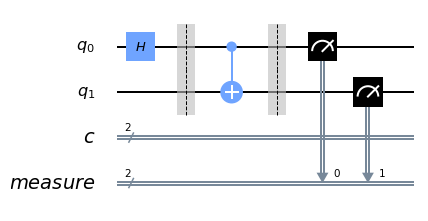

In [256]:
qc = QuantumCircuit(2, 2)
qc.h(0) #rotates Z to X and vice-versa
qc.barrier()
qc.cx(0, 1) 
qc.measure_all() #performs measurement on all qubits
qc.draw(output='mpl')

{'00 00': 512, '11 00': 512}


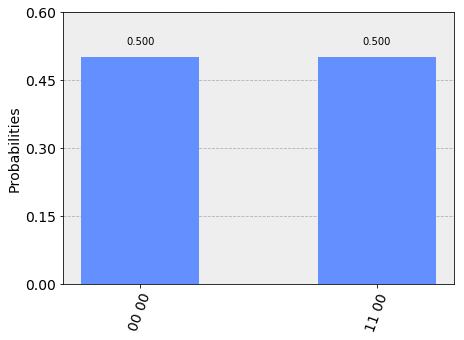

In [21]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

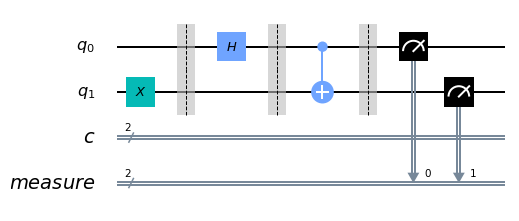

In [57]:
qc = QuantumCircuit(2, 2)
qc.x(1) #Flipping the initial state of the qubit
qc.barrier()
qc.h(0)
qc.barrier()
qc.cx(0, 1)
qc.measure_all()
qc.draw(output='mpl')

{'01 00': 514, '10 00': 510}


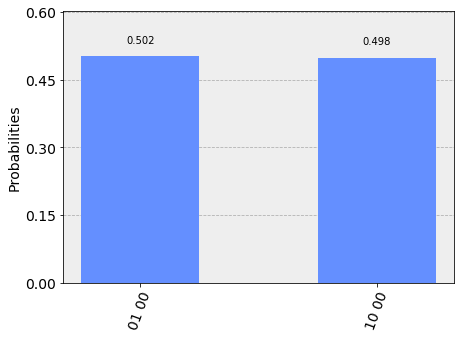

In [62]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

# Quantum Teleportation

## The concept

Alice wants to send quantum information to Bob. Specifically, suppose she wants to send the state
$\vert\psi\rangle = \alpha\vert0\rangle + \beta\vert1\rangle$
to Bob. This entails passing on information about $\alpha$ and $\beta$ to Bob.

There exists a theorem in quantum mechanics which states that you cannot simply make an exact copy of an unknown quantum state. This is known as the no-cloning theorem. As a result of this we can see that Alice can't simply generate a copy of $\vert\psi\rangle$ and give the copy to Bob. Copying a state is only possible with a classical computation.

However, by taking advantage of two classical bits and entanglement, Alice can transfer the state $\vert\psi\rangle$ to Bob. We call this teleportation as at the end Bob will have $\vert\psi\rangle$ and Alice won't anymore. Let's see how this works in some detail.

## How does quantum teleportation work?

**Step 1**: Alice and Bob create an entangled pair of qubits and each one of them holds on to one of the two qubits in the pair. The pair they create is a special pair called a Bell pair that we have discussed above. 

Let's say Alice owns $q_1$ and Bob owns $q_2$ after they part ways.

**Step 2**: Alice applies a CNOT gate on $q_1$, controlled by $\vert\psi\rangle$ (the qubit she is trying to send Bob). 

**Step 3**: Next, Alice applies a Hadamard gate to $|\psi\rangle$, and applies a measurement to both qubits that she owns - $q_1$ and $\vert\psi\rangle$.

**Step 4**: Then, it's time for a phone call to Bob. She tells Bob the outcome of her two qubit measurement. Depending on what she says, Bob applies some gates to his qubit, $q_2$. The gates to be applied, based on what Alice says, are as follows :

00 $\rightarrow$ Do nothing

01 $\rightarrow$ Apply $X$ gate

10 $\rightarrow$ Apply $Z$ gate

11 $\rightarrow$ Apply $ZX$ gate

*Note that this transfer of information is classical.*

And voila! At the end of this protocol, Alice's qubit has now teleported to Bob.

## Implementation

In this notebook, we will give Alice a secret state $\vert\psi\rangle$. This state will be generated by applying a series of unitary gates on a qubit that is initialized to the ground state, $\vert0\rangle$. Go ahead and fill in the secret unitary that will be applied to $\vert0\rangle$ before passing on the qubit to Alice.

In [1]:
secret_unitary = 'hz'

If the quantum teleportation circuit works, then at the output of the protocol discussed above will be the same state passed on to Alice. Then, we can undo the applied secret_unitary (by applying its conjugate transpose), to yield the $\vert0\rangle$ that we started with. 

We will then do repeated measurements of Bob's qubit to see how many times it gives 0 and how many times it gives 1.

### What do we expect?

In the ideal case, and assuming our teleportation protocol works, we will always measure 0 from Bob's qubit because we started off with $|0\rangle$.

In a real quantum computer, errors in the gates will cause a small fraction of the results to be 1. We'll see how it looks.

## 1. Simulating the teleportation protocol

In [3]:
# simple function that applies a series of unitary gates from a given string
def apply_secret_unitary(secret_unitary, qubit, quantum_circuit, dagger):
    functionmap = {
                    'x':quantum_circuit.x,
                    'y':quantum_circuit.y,
                    'z':quantum_circuit.z,
                    'h':quantum_circuit.h,                    
                    't':quantum_circuit.t,                    
    }
    if dagger: functionmap['t'] = quantum_circuit.tdg
    
    if dagger:
        [functionmap[unitary](qubit) for unitary in secret_unitary]
    else:
        [functionmap[unitary](qubit) for unitary in secret_unitary[::-1]]

In [4]:
# Create the quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

''' Qubit ordering as follows (classical registers will just contain measured values of the corresponding qubits):
q[0]: qubit to be teleported (Alice's first qubit. It was given to her after the application of a secret unitary 
      which she doesn't know)
q[1]: Alice's second qubit
q[2]: Bob's qubit, which will be the destination for the teleportation
'''

# Apply the secret unitary that we are using to generate the state to teleport. You can change it to any unitary
apply_secret_unitary(secret_unitary, qc.qubits[0], qc, dagger = 0)
qc.barrier()
# Next, generate the entangled pair between Alice and Bob (Remember: Hadamard followed by CX generates a Bell pair)
qc.h(1)
qc.cx(1, 2)
qc.barrier()
# Next, apply the teleportation protocol. 
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)
qc.cx(1, 2)
qc.cz(0, 2)
qc.barrier()

'''
In principle, if the teleportation protocol worked, we have q[2] = secret_unitary|0>
As a result, we should be able to recover q[2] = |0> by applying the reverse of secret_unitary
since for a unitary u, u^dagger u = I.
'''
apply_secret_unitary(secret_unitary, qc.qubits[2], qc, dagger=1)
qc.measure(2, 2)

It's always a good idea to draw the circuit that we have generated in code. Let's draw it below.

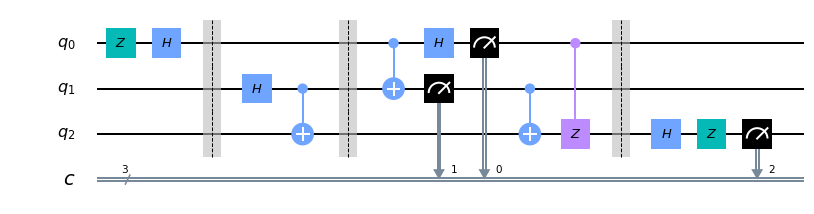

In [5]:
qc.draw(output='mpl')

{'010': 246, '001': 263, '011': 257, '000': 258}


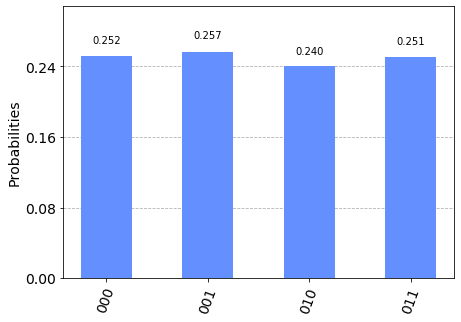

In [6]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

Note that the results on the x-axis in the histogram above are ordered as $c_2c_1c_0$. We can see that only results where $c_2 = 0$ appear, indicating that the teleporation protocol has worked.

# Greenberger-Horne-Zeilinger state i.e. (GHZ state)

The Greenberger-Horne-Zeilinger state is a certain type of entangled quantum state that involves at least three subsystems (qubits). For a $N$ qubit system it is defined as:
$$ |GHZ\rangle = \frac{|0\rangle^{\otimes N} + |1\rangle^{\otimes N}}{\sqrt{2}} $$

Simply put, it is a quantum superposition of all subsystems being in state $0$ with all of them being in state $1$ (states $0$ and $1$ of a single subsystem are fully distinguishable). The GHZ state is a maximally entangled quantum state.

Here, we will try to prepare the simplest one, i.e. the 3-qubit GHZ state:
$$ |GHZ\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}$$


## Preparing 3-qubit GHZ state

In quantum circuit language, the way to create a 3-qubit GHZ states is to first transfer the first qubit to the Hadamard basis ($|+\rangle$ and $|-\rangle$) by using a Hadamard gate, and then to applying two CNOT gates in pairwise fashion: ($CNOT(0,1)$, $CNOT(1,2)$).

## Implementation

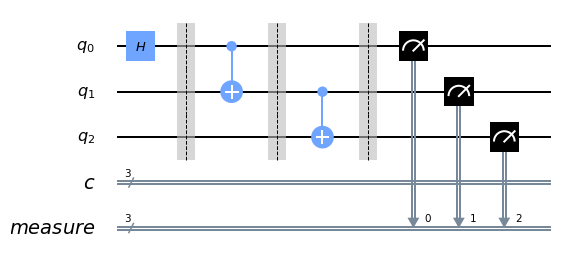

In [68]:
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.barrier()
qc.cx(0, 1)
qc.barrier()
qc.cx(1, 2)
qc.measure_all()
qc.draw(output='mpl')

{'111 000': 511, '000 000': 513}


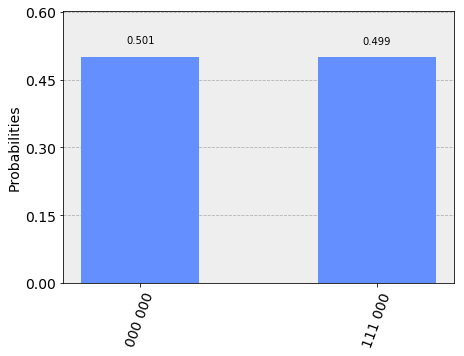

In [72]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

## [\#1] Challenge

Devise an algorithm to prepare the following generalized $GHZ_{N}$ state:
$$ |GHZ_{N}\rangle = \frac{|0\rangle^{\otimes N} + |1\rangle^{\otimes N}}{\sqrt{2}}$$

# W state

The $W$ state is an entangled quantum state of three qubits which has the following shape:
$$ W = \frac{|001\rangle + |010\rangle + |100\rangle}{\sqrt{3}}$$



## Preparing W state

We saw that construction of both Bell states and GHZ state was quite straight forward. However, preparing $W$ state is quite tricky as its (one of the simplest) preparation make use of a custom gate $G(p)$ and anti-controlled gates.

$$G(p) = \begin{bmatrix} \sqrt{1-p} & -\sqrt{p} \\ \sqrt{p} & \sqrt{1-p} \end{bmatrix}$$

This can be implemented as a $U_{3}(\theta,\phi,\lambda)$ gate with $\phi=\lambda=0$, which amounts to a standard SU(2) representation of a rotation of angle $\theta$ around the y-axis.

$$U_{3}(\theta,\phi,\lambda) = \begin{bmatrix} \cos{\frac{\theta}{2}} & -e^{-\iota\lambda}\sin{\frac{\theta}{2}}  \\ e^{\iota \phi}\sin{\frac{\theta}{2}} & e^{\iota(\lambda+\phi)}\cos{\frac{\theta}{2}} \end{bmatrix}$$

Therefore, in our case for $p=1/3$, we have $\theta=2\times\cos^{-1}{\sqrt{1-p}}$. Moreover, the anti-controlled gates can be implemented $AC-U = XC-UX$, i.e. sandwiching controlled gate bebtween two $X$ gates.

## Implementation

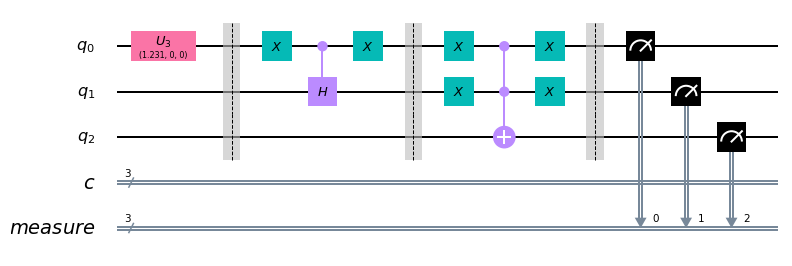

In [171]:
qc = QuantumCircuit(3, 3)
# Custom Gate (G(1/3))
qc.u3(2*np.arccos(np.sqrt(2/3)),0,0,0)
qc.barrier()
# Anti-Controlled Hadamamrd
qc.x(0)
qc.ch(0, 1)
qc.x(0)
qc.barrier()
# Anti-Controlled toffoli
qc.x(0)
qc.x(1)
qc.ccx(0, 1, 2)
qc.x(1)
qc.x(0)
qc.measure_all()
qc.draw(output='mpl')

{'100 000': 695, '010 000': 664, '001 000': 689}


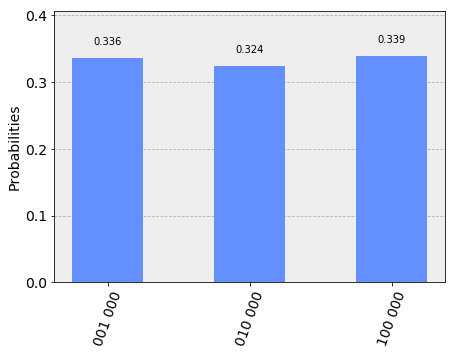

In [190]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=2048)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

## [\#2] Challenge

Devise an algorithm to prepare the following generalized $W_{N}$ state:
$$ |W_{N}\rangle = \frac{|000\ldots 1\rangle + \ldots + |010\ldots 0\rangle + |100\ldots 0\rangle}{\sqrt{N}}$$

# Entanglement Swapping

Entanglement Swapping is a technique to implement quantum correlation in a system. This is done via measurements on one particle of the each of the two pairs of entangled particles, leaving the unmeasured particles correlated.  This messes up with the normal expectation of correlations as two particles who never had shared a common past now are correlated, and affect measurements per-formed on each other.

## Description:
Alice has one particle, Bob two, and Carol one. Alice's particle and Bob's first particle are entangled, and so are Bob's second and Carol's particle. Now, if Bob does a projective measurement on his two particles in the Bell state basis and communicates the results to Carol, as per the teleportation scheme described above, the state of Bob's first particle can be teleported to Carol's. Although Alice and Carol never interacted with each other, their particles are now entangled.

## Implementation

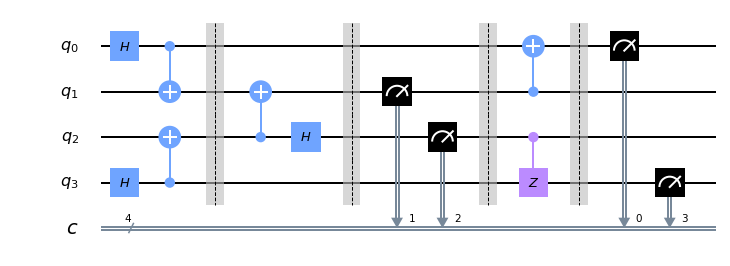

In [234]:
qc = QuantumCircuit(4, 4)
# Prepare Entangled States (A-B and C-B)
qc.h(0)
qc.h(3)
qc.cx(0, 1)
qc.cx(3, 2)
qc.barrier()
# Measurement by Bob
qc.cx(2, 1)
qc.h(2)
qc.barrier()
qc.measure(1,1)
qc.measure(2,2)
qc.barrier()
# Indicating Phase and Parity
qc.cx(1, 0)
qc.cz(2, 3)
qc.barrier()
# Final Measurement by Alice and Carol
qc.measure(0,0)
qc.measure(3,3)
qc.draw(output='mpl')

{'00': 16343, '11': 16425}


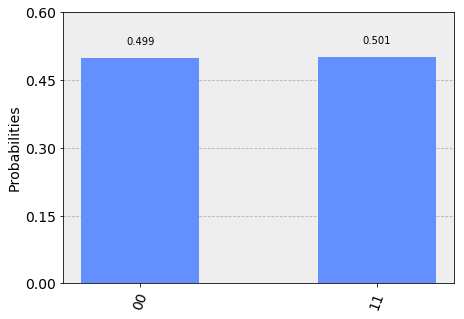

In [255]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=4096*8)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)

traced_result = {'00':0, '11':0}
for v, k in measurement_result.items():
    res = 0
    if v[0] == '0':
        res = traced_result['00'] + k
        traced_result.update({'00':res})
    else:
        res = traced_result['11'] + k
        traced_result.update({'11':res})

print(traced_result)
plot_histogram(traced_result)

The really important thing to realize is that, after that Bell basis measurement, Alice and Carol could be in one of many possible entangled states. Their qubits might be entangled to agree along the $X$ axis, or to disagree. They also might agree or disagree along the $Z$ axis. Concretely speaking, they could be in the state $|00\rangle + |11\rangle$, or in the state $|01\rangle + |10\rangle$, or in the state $|00\rangle - |11\rangle$, or in the state $|01\rangle - |10\rangle$.

But then there's still Bob's measurement results. They reveal which entangled case Alice and Carol ended up in. Bob knows their state's X-parity and its Z-parity. All Bob has to do is tell Alice and Carol "Hey, the Z-parity came out 'disagree' so one of you flip your qubit 180 degrees around the X axis to fix that". Do the same for the X-parity, and the problem is solved: Alice and Carorl will definitely end up in the state $|00\rangle + |11\rangle$ after the corrections. Therefore, although Alice and Carol never interacted with each other, their particles are now entangled.